In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Projeto - Aplicação de Redes Neurais

## Questão 1:
Carregar os dados e realizar a limpeza dos dados (se necessário)

In [2]:
db = pd.read_csv('db.csv')

In [3]:
db.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


In [4]:
db.dtypes

t0         float64
t1         float64
t2         float64
t3         float64
t4         float64
            ...   
t196       float64
t197       float64
t198       float64
t199       float64
Classes      int64
Length: 201, dtype: object

In [5]:
db.isnull().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

## Questão 2:
Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada Classe). Como na Figura 1 , abaixo, que representa um eletrodoméstico da Classe 1.

In [6]:
def plotClasses(df, lin=1):
    '''Função para plotar o gráfico de um dado aparelho de uma dada classe'''
    class_col_unique = df['Classes'].unique()

    charts = [x for x in range(len(class_col_unique))]
    colors_array = cm.rainbow(np.linspace(0, 1, len(charts)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    fig, charts = plt.subplots(len(class_col_unique),1)
    class_ = 1

    for chart in charts:
        chart.set_title(f'Class {class_col_unique[class_-1]}', fontsize=14)
        chart.set_xlabel('Time', fontweight='bold')
        chart.set_ylabel('Tension', fontweight='bold')
        plt.xlim([-2, 200])

        df_filt = df[df['Classes'] == class_]
        df_filt.iloc[lin,:-1].T.plot(color = rainbow[class_-1] ,kind='line', figsize=(16, 8), ax=chart)
        class_+=1

    fig.set_size_inches(10, 50)
    plt.show()

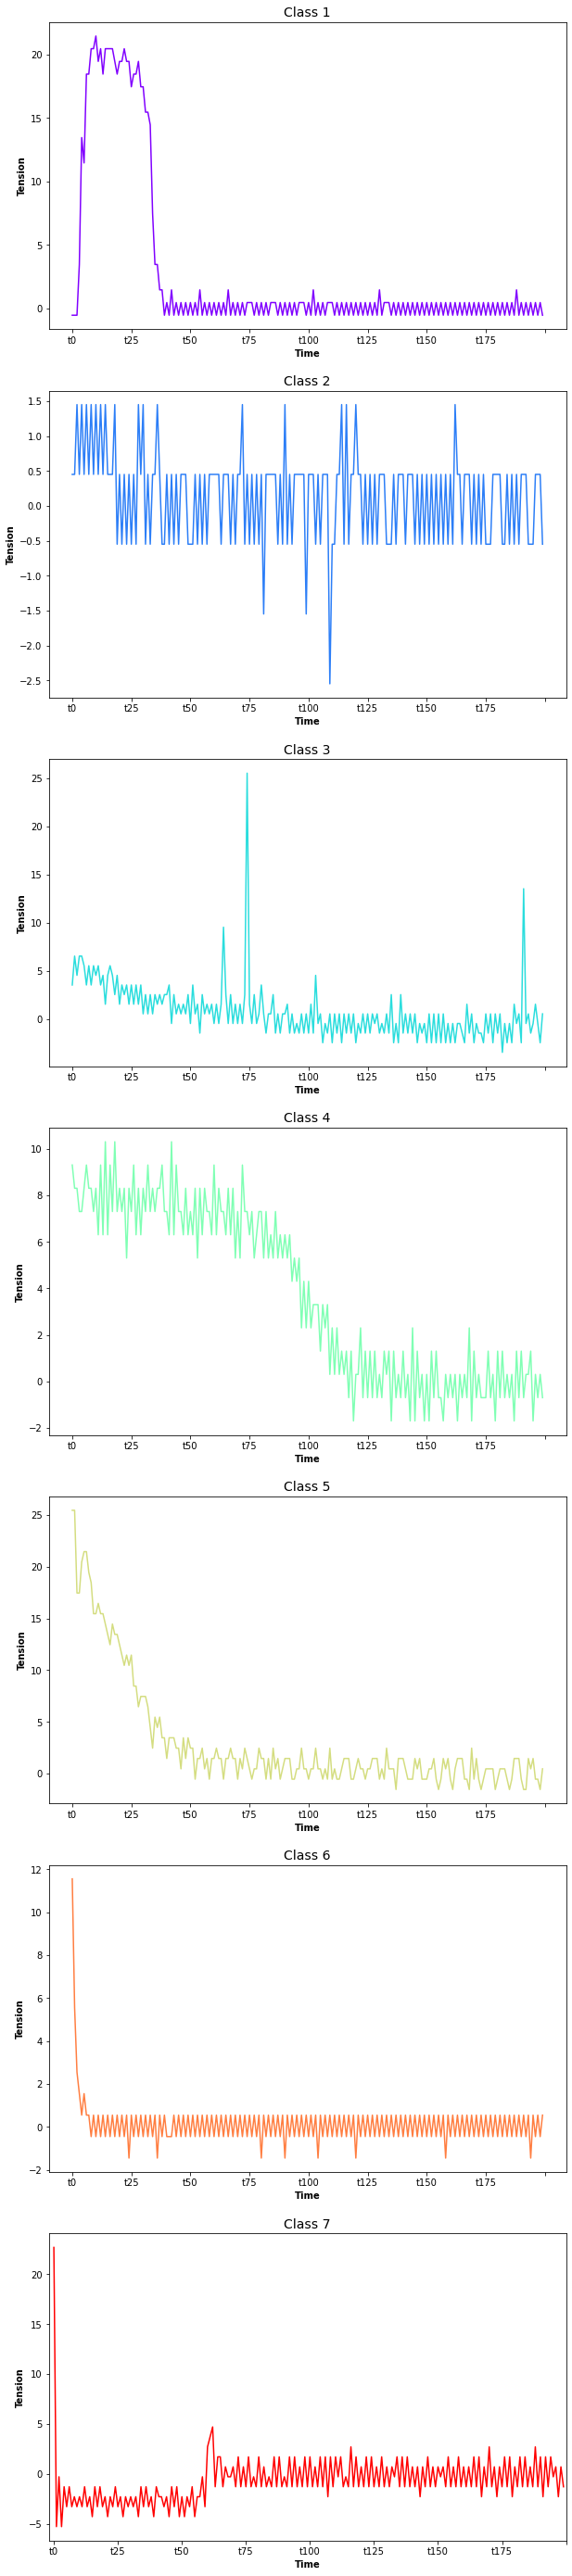

In [7]:
plotClasses(db,2)

## Questão 3:
Como é um problema muticlasse, o aluno deverá transformar os labels para uma representação correta.

In [8]:
#Remover o "t" das colunas
db.columns = db.columns.str.replace('t','')
db

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


## Questão 4:
Preparar os dados para se apresentados à ML

In [9]:
X = db.drop('Classes', axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,0.70,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,0.35,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,1.70,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30


In [10]:
#Gerando dummies das classes, que serão a saída de nossa ML
Y = pd.get_dummies(db['Classes'])
Y

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,0,0,0,1,0,0
96,0,0,0,0,0,1,0
97,0,0,0,0,0,1,0
98,0,0,0,0,0,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Questão 5:
Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para determinar esses parâmetros.

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(500,250,125), random_state=1, max_iter=1000, verbose=True, learning_rate_init=0.001)

In [14]:
clf.fit(X_train, y_train)

Iteration 1, loss = 5.25082033
Iteration 2, loss = 3.73261539
Iteration 3, loss = 2.91364449
Iteration 4, loss = 2.38898670
Iteration 5, loss = 2.03789576
Iteration 6, loss = 1.80074202
Iteration 7, loss = 1.60907155
Iteration 8, loss = 1.43357525
Iteration 9, loss = 1.26142326
Iteration 10, loss = 1.09812258
Iteration 11, loss = 0.95591848
Iteration 12, loss = 0.83735333
Iteration 13, loss = 0.73580197
Iteration 14, loss = 0.64411459
Iteration 15, loss = 0.56043830
Iteration 16, loss = 0.48773234
Iteration 17, loss = 0.42665828
Iteration 18, loss = 0.37504629
Iteration 19, loss = 0.32740608
Iteration 20, loss = 0.28102976
Iteration 21, loss = 0.23789652
Iteration 22, loss = 0.20097380
Iteration 23, loss = 0.17139145
Iteration 24, loss = 0.14716583
Iteration 25, loss = 0.12639750
Iteration 26, loss = 0.10807462
Iteration 27, loss = 0.09137796
Iteration 28, loss = 0.07656502
Iteration 29, loss = 0.06425121
Iteration 30, loss = 0.05450489
Iteration 31, loss = 0.04670827
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(500, 250, 125), max_iter=1000, random_state=1,
              verbose=True)

In [15]:
clf.predict(X_test)

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

## Questão 6:
Testar e validar os resultados

In [16]:
clf.score(X_test,y_test)

1.0

In [17]:
clf.score(X_train,y_train)

1.0

## Questão 7:
Avaliar o usa de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).

In [18]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'cumulative explained variance')

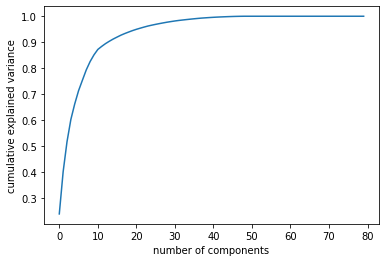

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
pca = PCA(n_components=0.85)
pca.fit(X_train)
X_pca_Train = pca.transform(X_train)

In [21]:
clf2 = MLPClassifier(hidden_layer_sizes=(500,250,125), random_state=1, max_iter=1000, verbose=True)

In [22]:
clf2.fit(X_pca_Train, y_train)

Iteration 1, loss = 5.48531313
Iteration 2, loss = 4.19326010
Iteration 3, loss = 3.39549822
Iteration 4, loss = 2.86275569
Iteration 5, loss = 2.48802963
Iteration 6, loss = 2.21693137
Iteration 7, loss = 2.00893746
Iteration 8, loss = 1.84201678
Iteration 9, loss = 1.70413522
Iteration 10, loss = 1.58737823
Iteration 11, loss = 1.48376325
Iteration 12, loss = 1.38929423
Iteration 13, loss = 1.30535605
Iteration 14, loss = 1.23433946
Iteration 15, loss = 1.17325517
Iteration 16, loss = 1.11614179
Iteration 17, loss = 1.06070899
Iteration 18, loss = 1.00665105
Iteration 19, loss = 0.95486365
Iteration 20, loss = 0.90694298
Iteration 21, loss = 0.86246101
Iteration 22, loss = 0.82179658
Iteration 23, loss = 0.78387096
Iteration 24, loss = 0.74913122
Iteration 25, loss = 0.71591026
Iteration 26, loss = 0.68416580
Iteration 27, loss = 0.65432169
Iteration 28, loss = 0.62591641
Iteration 29, loss = 0.59936022
Iteration 30, loss = 0.57367034
Iteration 31, loss = 0.54901768
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(500, 250, 125), max_iter=1000, random_state=1,
              verbose=True)

In [23]:
clf2.score(X_pca_Train,y_train)

1.0

## Questão 8:
Conclusão:
Quando utilizamos o PCA não houve melhorar no score